In [1]:
pip install --upgrade pip # type: ignore

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import all tools

# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.metrics import plot_roc_curve
from mpl_toolkits.mplot3d import Axes3D

import os


In [5]:
import sklearn
print(sklearn.__version__)

1.6.1


In [6]:
from sklearn.metrics import RocCurveDisplay

In [7]:
data = pd.read_csv('blood.csv')
data

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [8]:
print(data.head())
print(data.describe())

   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000


In [9]:
# data exploration
data["Class"].value_counts()

Class
0    570
1    178
Name: count, dtype: int64

In [10]:
def plot_column_distributions(data, nGraphShown=10, nGraphPerRow=3, output_dir="/mnt/data/column_distributions"):
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    sns.set(style="whitegrid")
    nunique = data.nunique()
    filtered_data = data[[col for col in data if 1 < nunique[col] < 50]]
    nRow, nCol = filtered_data.shape
    columnNames = list(filtered_data)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow

    # Set up the figure
    fig, axes = plt.subplots(nGraphRow, nGraphPerRow, figsize=(6 * nGraphPerRow, 5 * nGraphRow))
    axes = axes.flatten() if nCol > 1 else [axes]

    for i in range(min(nCol, nGraphShown)):
        col = columnNames[i]
        ax = axes[i]
        col_data = filtered_data[col]

        if not np.issubdtype(col_data.dtype, np.number):
            value_counts = col_data.value_counts()
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette="viridis")
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        else:
            sns.histplot(col_data, kde=False, ax=ax, bins=15, color='skyblue')

        ax.set_title(f"{col} (Column {i})")
        ax.set_ylabel("Counts")

        # Save individual plot
        fig_i = plt.figure(figsize=(6, 5))
        ax_i = fig_i.add_subplot(111)
        if not np.issubdtype(col_data.dtype, np.number):
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax_i, palette="viridis")
            ax_i.set_xticklabels(ax_i.get_xticklabels(), rotation=45, ha='right')
        else:
            sns.histplot(col_data, kde=False, ax=ax_i, bins=15, color='skyblue')
        ax_i.set_title(f"{col} (Column {i})")
        ax_i.set_ylabel("Counts")
        fig_i.tight_layout()
        fig_i.savefig(f"{output_dir}/{col}_distribution.png")
        plt.close(fig_i)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.savefig(f"{output_dir}/all_distributions_grid.png")
    plt.close(fig)
    return output_dir

# Create a sample DataFrame to demonstrate the function
df_sample = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C'], size=100),
    'Score': np.random.randint(1, 100, size=100),
    'Level': np.random.choice(['Low', 'Medium', 'High'], size=100)
})



In [ ]:
%pip install fpdf

In [12]:

def plotPerColumnDistribution(data, nGraphShown=10, nGraphPerRow=3):
    nunique = data.nunique()
    # Filter columns with low cardinality for visualization
    data = data[[col for col in data if 1 < nunique[col] < 50]]
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Make sure it's an int

    plt.figure(figsize=(6 * nGraphPerRow, 5 * nGraphRow), dpi=100)
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]

        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist(bins=15)

        plt.ylabel('Counts')
        plt.xticks(rotation=45)
        plt.title(f'{columnNames[i]} (col {i})')

    plt.tight_layout()
    plt.show()


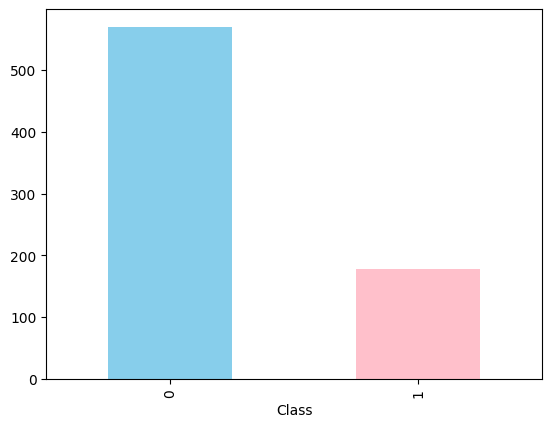

In [13]:
data["Class"].value_counts().plot(kind="bar", color=["skyblue", "pink"]);

In [14]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


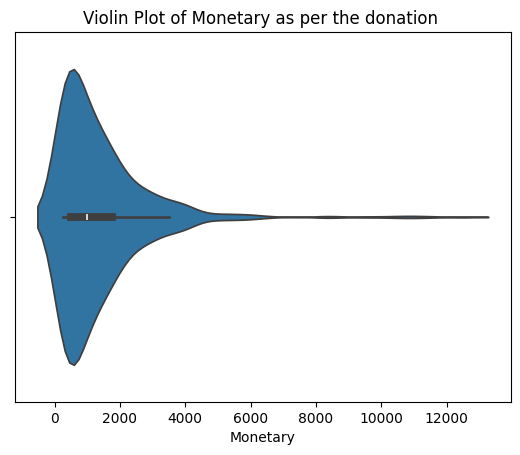

In [15]:
sns.violinplot(x=data['Monetary'])
plt.title('Violin Plot of Monetary as per the donation ')
plt.show()

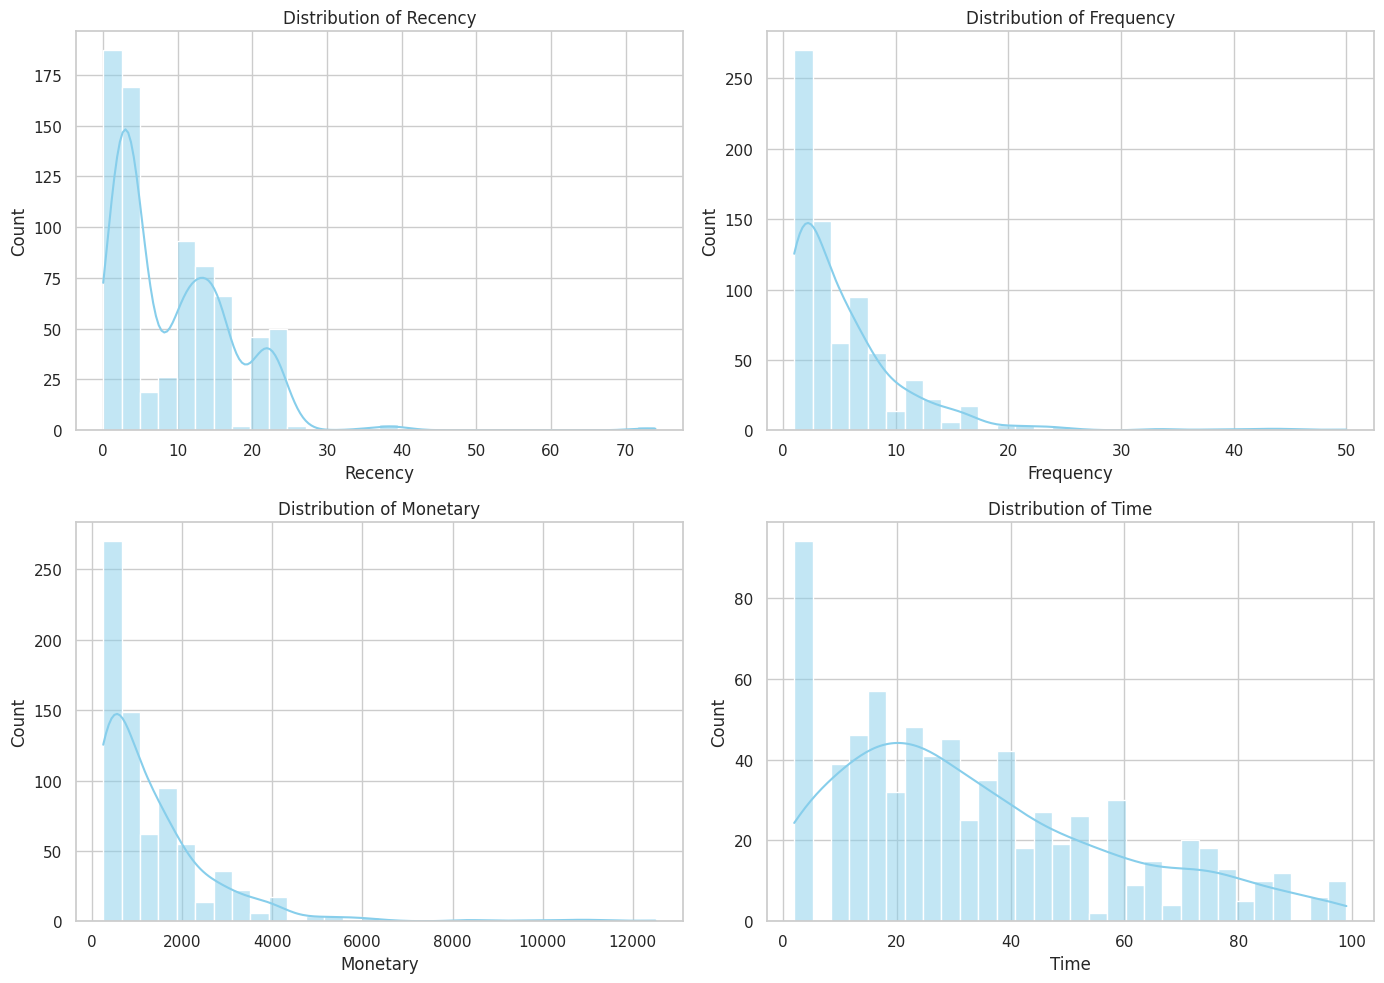

In [16]:
# Set seaborn theme
sns.set(style="whitegrid")

# Plot distributions of all numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

cols = ['Recency', 'Frequency', 'Monetary', 'Time']
for i, col in enumerate(cols):
    ax = axes[i // 2, i % 2]
    sns.histplot(data[col], kde=True, bins=30, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [18]:
data.isna().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

In [19]:
#Renaming the target column
df=data.rename(columns={'Class':'target'})
df.head()

,Recency,Frequency,Monetary,Time,target
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [20]:
df["Recency"].value_counts().sort_index()

Recency
0       5
1       9
2     173
3      13
4     156
5       6
6       5
7       8
8       6
9      20
10      3
11     84
12      6
13      5
14     76
15      2
16     63
17      1
18      2
20      1
21     44
22      1
23     50
25      1
26      1
35      1
38      2
39      1
40      1
72      1
74      1
Name: count, dtype: int64

In [21]:
df["Frequency"].value_counts().sort_index()

Frequency
1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
10     14
11     22
12     14
13      9
14     13
15      6
16     12
17      5
18      1
19      2
20      2
21      2
22      2
23      1
24      3
26      1
33      1
34      1
38      1
41      1
43      1
44      1
46      1
50      1
Name: count, dtype: int64

In [22]:
df["Monetary"].value_counts()

Monetary
250      158
500      112
750       87
1250      62
1000      62
1500      52
1750      43
2000      31
2250      24
2750      22
2500      14
3000      14
3500      13
4000      13
3250       9
3750       6
4250       4
6000       3
5500       2
5000       2
4750       2
5250       2
12500      1
5750       1
11500      1
4500       1
9500       1
8500       1
10750      1
11000      1
6500       1
10250      1
8250       1
Name: count, dtype: int64

In [23]:
pd.crosstab(df["target"], df["Frequency"])

Frequency,1,2,3,4,5,6,7,8,9,10,...,24,26,33,34,38,41,43,44,46,50
target,,,,,,,,,,,,,,,,,,,,,
0,138,93,73,49,42,35,31,18,18,8,...,3,0,0,0,1,0,0,1,0,0
1,20,19,14,13,20,17,12,13,6,6,...,0,1,1,1,0,1,1,0,1,1


In [24]:
pd.crosstab(df["target"], df["Recency"])

Recency,0,1,2,3,4,5,6,7,8,9,...,22,23,25,26,35,38,39,40,72,74
target,,,,,,,,,,,,,,,,,,,,,
0,3,7,107,8,98,4,3,7,5,16,...,0,49,1,0,1,2,1,1,1,1
1,2,2,66,5,58,2,2,1,1,4,...,1,1,0,1,0,0,0,0,0,0


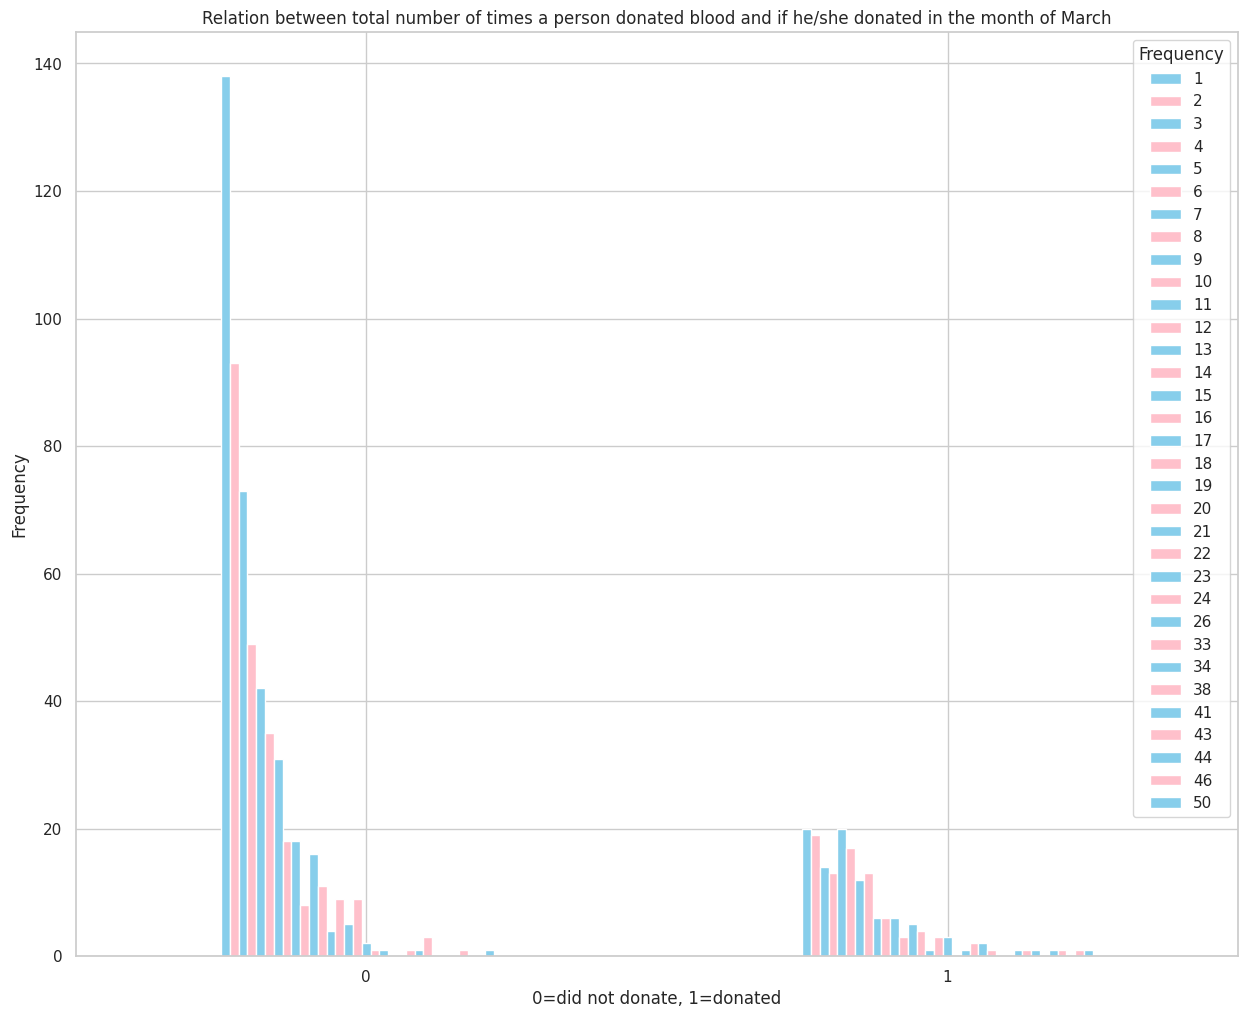

In [25]:
pd.crosstab(df["target"], df["Frequency"]).plot(kind="bar", figsize=(15, 12), color=["skyblue", "pink"])
plt.title("Relation between total number of times a person donated blood and if he/she donated in the month of March")
plt.xlabel("0=did not donate, 1=donated")
plt.ylabel("Frequency")
plt.xticks(rotation=0);

In [26]:
#correlation matrix
corr_matrix=df.corr()
corr_matrix

,Recency,Frequency,Monetary,Time,target
Recency,1.000000,-0.182908,-0.182745,0.160486,-0.279869
Frequency,-0.182908,1.000000,0.999980,0.635106,0.218949
Monetary,-0.182745,0.999980,1.000000,0.635364,0.218633
Time,0.160486,0.635106,0.635364,1.000000,-0.035653
target,-0.279869,0.218949,0.218633,-0.035653,1.000000


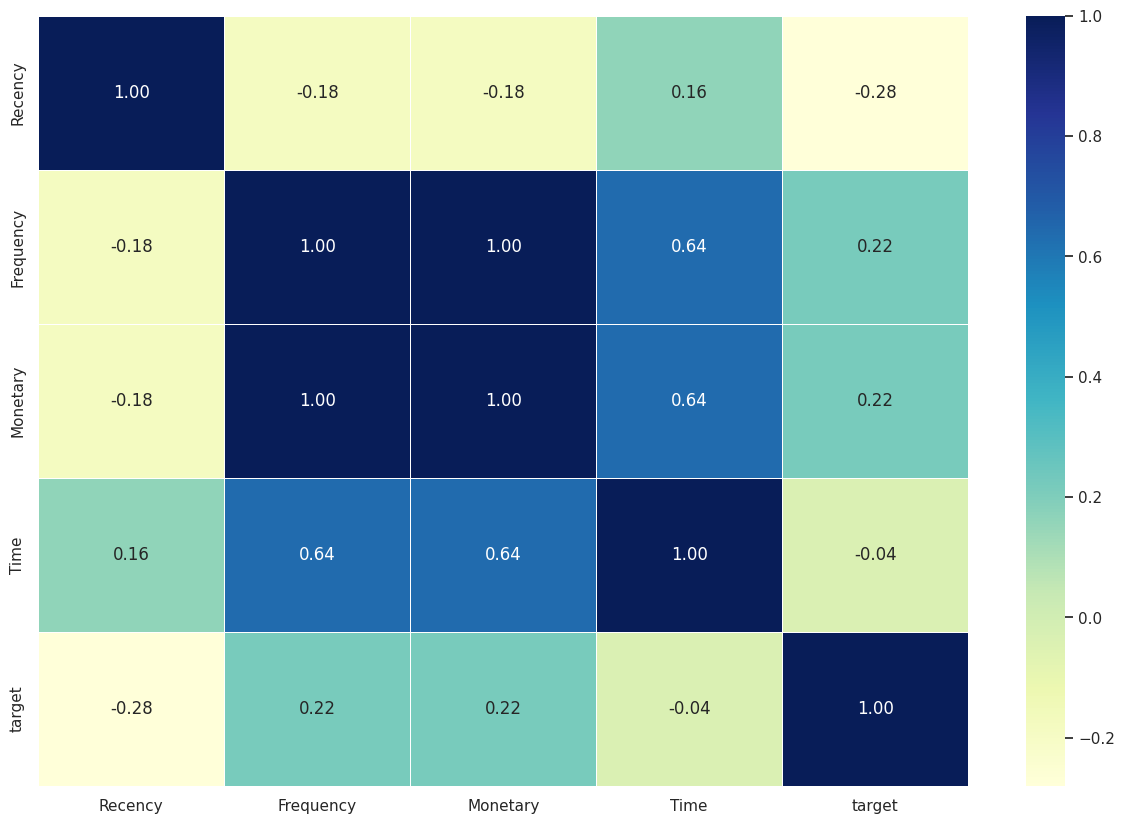

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [28]:
#modeling
np.random.seed(42)
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(598, 4) (150, 4) (598,) (150,)


In [30]:
X_train.head()

,Recency,Frequency,Monetary,Time
529,2,6,1500,22
271,16,7,1750,28
455,21,1,250,21
175,11,10,2500,35
309,16,3,750,19


In [31]:
y_train, len(y_train)

(529    1
 271    0
 455    0
 175    0
 309    0
       ..
 623    0
 681    0
 3      1
 366    0
 308    0
 Name: target, Length: 598, dtype: int64,
 598)

In [32]:
X_test.head()

,Recency,Frequency,Monetary,Time
514,4,16,4000,38
417,16,1,250,16
497,38,1,250,38
91,4,2,500,4
312,12,9,2250,60


In [33]:
y_test, len(y_test)

(514    1
 417    0
 497    0
 91     0
 312    0
       ..
 668    0
 86     0
 42     1
 344    0
 300    0
 Name: target, Length: 150, dtype: int64,
 150)

In [34]:
#creating dictionary with models
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression()}

#function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed=42
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [35]:
model_scores= fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'KNN': 0.76, 'Logistic Regression': 0.7666666666666667}

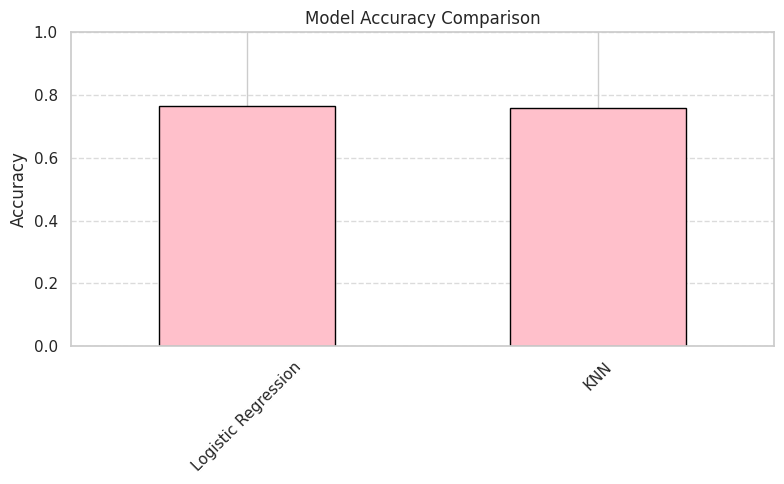

In [36]:
model_compare = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
model_compare.sort_values('Accuracy', ascending=False).plot.bar(
    figsize=(8,5),
    legend=False,
    color='pink',
    edgecolor='black'
)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # assuming scores are 0-1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [37]:
# Tuning hyperparameters

#KNN hyperparameters
knn_grid = {"n_neighbors": np.arange(1, 21, 2),
            "metric": ["euclidean", "manhattan", "minkowski"],
            "weights": ["uniform", "distance"]}

# Logistic Regression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [38]:
#Tuning KNN model with GridSearchCV

gs_knn_grid= GridSearchCV(KNeighborsClassifier(), param_grid=knn_grid, cv=5, verbose=True)
gs_knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [39]:
gs_knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(11), 'weights': 'uniform'}

In [40]:
gs_knn_grid.score(X_test, y_test)

0.78

In [41]:
#Tuning Logistic Regression model with GridSearchCV

gs_log_reg_grid= GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg_grid.best_params_

{'C': np.float64(0.0018329807108324356), 'solver': 'liblinear'}

In [43]:
gs_log_reg_grid.score(X_test, y_test)

0.7733333333333333

In [44]:
#Evaluating classification model
y_preds=gs_knn_grid.predict(X_test)

In [45]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

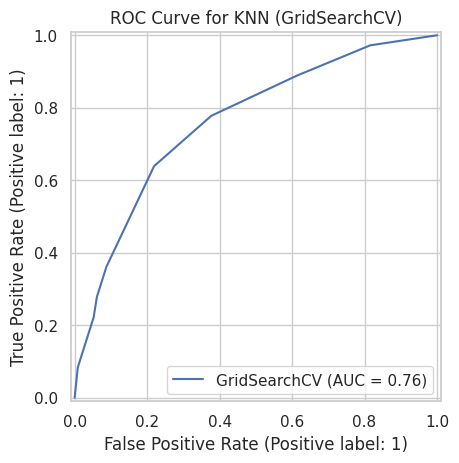

In [46]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_knn_grid, X_test, y_test)
plt.title("ROC Curve for KNN (GridSearchCV)")
plt.show()

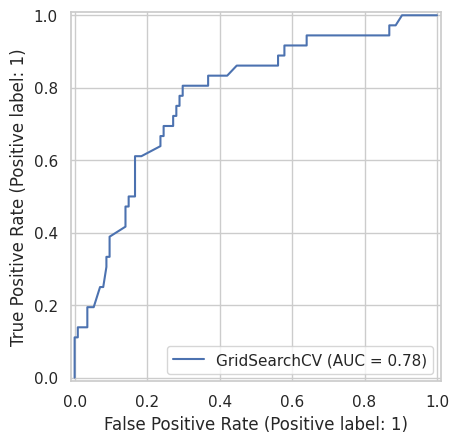

In [47]:
RocCurveDisplay.from_estimator(gs_log_reg_grid, X_test, y_test)
plt.show()

In [48]:
print(confusion_matrix(y_test, y_preds))

[[107   7]
 [ 26  10]]


              precision    recall  f1-score   support

 Not Donated       0.80      0.94      0.87       114
     Donated       0.59      0.28      0.38        36

    accuracy                           0.78       150
   macro avg       0.70      0.61      0.62       150
weighted avg       0.75      0.78      0.75       150



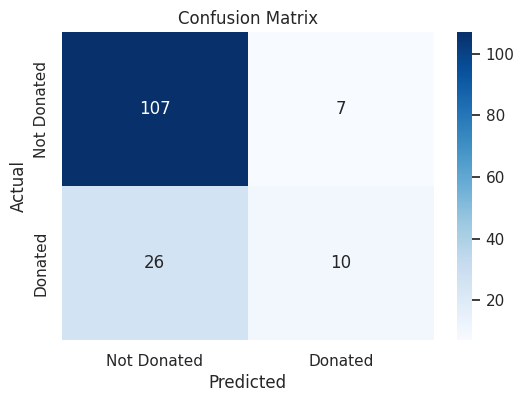

In [49]:
print(classification_report(y_test, y_preds, target_names=['Not Donated', 'Donated']))

def plot_conf_mat(y_true, y_pred, labels):
	cm = confusion_matrix(y_true, y_pred)
	plt.figure(figsize=(6,4))
	sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
				xticklabels=labels, yticklabels=labels)
	plt.xlabel('Predicted')
	plt.ylabel('Actual')
	plt.title('Confusion Matrix')
	plt.show()

plot_conf_mat(y_test, y_preds, labels=['Not Donated', 'Donated'])

In [50]:
#Instantiate logistic regression model with best hyperparameters
gs_log_reg_grid.best_params_

{'C': np.float64(0.0018329807108324356), 'solver': 'liblinear'}

In [51]:
clf= LogisticRegression(C=0.0018329807108324356, solver="liblinear")

In [52]:
# cross validated accuracy score

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.82666667, 0.76      , 0.76      , 0.82550336, 0.76510067])

In [53]:
# averaging the 5 metrics
cv_acc=np.mean(cv_acc)
cv_acc

np.float64(0.7874541387024608)

In [54]:
# precision score

cv_precision = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cv_precision

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.25256410256410255)

In [55]:
# recall score

cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cv_recall

np.float64(0.2750793650793651)

In [56]:
# f1 score

cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
cv_f1

np.float64(0.2570381231671554)

In [57]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
# cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

you face any future warnings assign the x variable (Metric) to hue and set legend=False in your sns.barplot

if /tmp/ipykernel_7708/2865582378.py:7: FutureWarning:

Passing palette without assigning hue is deprecated and will be removed in v0.14.0. Assign the x variable to hue and set legend=False for the same effect.

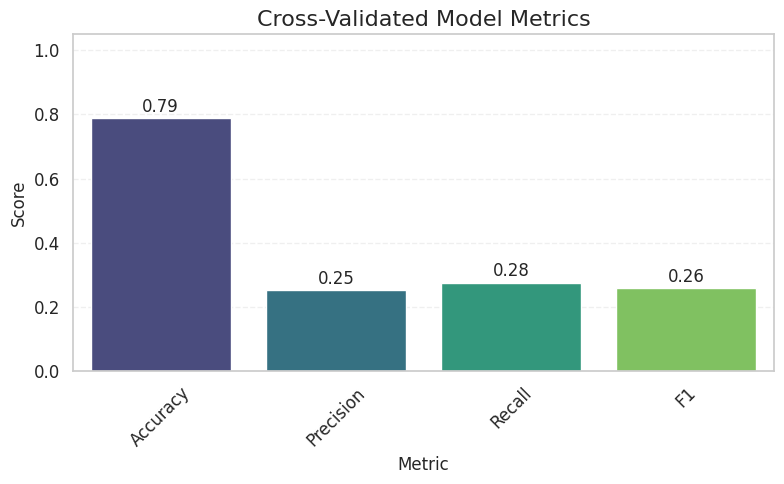

In [58]:
# Convert to long format for Seaborn
cv_long = cv_metrics.melt(var_name="Metric", value_name="Score")

plt.figure(figsize=(8, 5))
sns.barplot(
    data=cv_long,
    x="Metric",
    y="Score",
    hue="Metric",           # Assign x variable to hue
    palette="viridis",
    legend=False            # Hide legend since hue is same as x
)

plt.title("Cross-Validated Model Metrics", fontsize=16)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels
for index, row in cv_long.iterrows():
    plt.text(index, row.Score + 0.02, f"{row.Score:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

We've got the accuracy we've got the metrics but the accuracy couldn't hit a better rate so, Lets try the process Using Piplines to choose the better model and navigate with ease in training and optimising models

http://epistasislab.github.io/tpot/

In referal to the above repository Lets breakdown how we could utilise an Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

TPOT stands for Tree-based Pipeline Optimization Tool. TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming. Consider TPOT your Data Science Assistant.

Contributors

TPOT recently went through a major refactoring. The package was rewritten from scratch to improve efficiency and performance, support new features, and fix numerous bugs. New features include genetic feature selection, a significantly expanded and more flexible method of defining search spaces, multi-objective optimization, a more modular framework allowing for easier customization of the evolutionary algorithm, and more. While in development, this new version was referred to as "TPOT2" but we have now merged what was once TPOT2 into the main TPOT package. You can learn more about this new version of TPOT in our GPTP paper titled "TPOT2: A New Graph-Based Implementation of the Tree-Based Pipeline Optimization Tool for Automated Machine Learning."

Ribeiro, P. et al. (2024). TPOT2: A New Graph-Based Implementation of the Tree-Based Pipeline Optimization Tool for Automated Machine Learning. In: Winkler, S., Trujillo, L., Ofria, C., Hu, T. (eds) Genetic Programming Theory and Practice XX. Genetic and Evolutionary Computation. Springer, Singapore. https://doi.org/10.1007/978-981-99-8413-8_1

Please see the repository license for the licensing and usage information for TPOT. Generally, we have licensed TPOT to make it as widely usable as possible.

TPOT is free software: you can redistribute it and/or modify it under the terms of the GNU Lesser General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

TPOT is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License along with TPOT. If not, see http://www.gnu.org/licenses/.

![Alt text for image](https://github.com/user-attachments/assets/3271534a-3f1e-471b-b8f4-18330bb525f0 "TPOT")

In [72]:
# Install tpot if not already installed
%pip install tpot

# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbose=2,  # changed from 'verbosity' to 'verbose'
    random_state=42,
)

Note: you may need to restart the kernel to use updated packages.


In [73]:
tpot.fit(X_train, y_train)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
Generation:   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/python/3.12.1/lib/python3.12/site-packages/stopit/__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Generation: 100%|██████████| 5/5 [04:08<00:00, 49.64s/it]


TPOTClassifier(random_state=42,
               search_space=<tpot.search_spaces.pipelines.sequential.SequentialPipeline object at 0x792476c2ea80>)